In [13]:
from qiskit_aer import Aer 
import numpy as np
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms import QAOA
from qiskit.primitives import Sampler
from qiskit_optimization.applications import Maxcut
import networkx as nx

# Define the graph
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)])  # Adding edges

# Convert the graph into a quadratic program using MaxCut
w = nx.adjacency_matrix(G).toarray()
maxcut = Maxcut(w)
quadratic_program = maxcut.to_quadratic_program()

# Define the backend and optimizer
#simulator = Aer.get_backend('statevector_simulator')  # Using the statevector simulator
#optimizer = COBYLA(maxiter=100)
optimizer = COBYLA()
##estimator=Estimator()
sampler = Sampler()

# Use QAOA with the Estimator primitive
qaoa = QAOA(sampler, optimizer, reps=2)  # Using 2 QAOA layers

#print(w)
# Get the operator and offset
op, offset = quadratic_program.to_ising()
#print(op)
qaoa_result = qaoa.compute_minimum_eigenvalue(op)

# Run the QAOA algorithm
qaoa_result = qaoa.compute_minimum_eigenvalue(op)
binary_string = qaoa_result.eigenstate
solution = np.array([int(bit) for bit in binary_string])

# Print the solution
print(f"Edges in the cut: {G.edges}")
print("max_cut = ", len(G.edges))


C:\Users\shubh\AppData\Local\Temp\ipykernel_18260\3163981683.py:23: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Edges in the cut: [(0, 1), (0, 3), (0, 2), (1, 2), (2, 3)]
max_cut =  5


[[0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0.]]
SparsePauliOp(['IIZIZ', 'IZIIZ', 'ZIIIZ', 'IIZZI', 'IZZII', 'ZIZII', 'ZZIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])


C:\Users\shubh\AppData\Local\Temp\ipykernel_18260\3901255886.py:47: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Edges in the cut: [(0, 2), (0, 3), (0, 4), (1, 2), (2, 3), (2, 4), (3, 4)]
max_cut =  7
classical solution = [1, 0, 1, 0, 0] cut value = 5.0


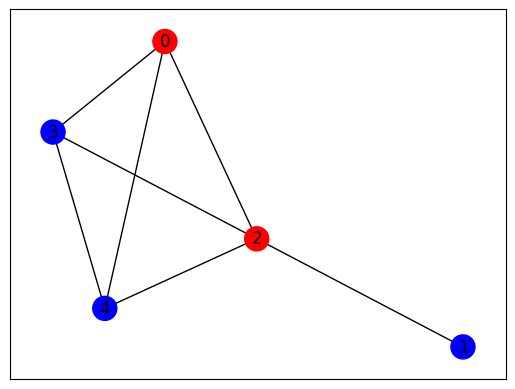

In [ ]:
#importing the networkx library
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np
#from qiskit_aer import Aer 
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms import QAOA
from qiskit.primitives import Sampler
from qiskit_optimization.applications import Maxcut

n = 5
G= nx.erdos_renyi_graph(n,0.5)
#nx.draw(G, with_labels=True)


pos = nx.spring_layout(G)
for (u, v) in G.edges():
    G[u][v]['weight'] = random.uniform(1.0, 1.0)
colors = ["slateblue" for node in G.nodes()]

def f(G,colors,pos):
    nx.draw_networkx(G,node_color=colors,pos=pos)


w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i][j] = temp["weight"]
print(w)


quadratic_program = Maxcut(w).to_quadratic_program()
#print(maxcut)
#print(quadratic_program)

# Define the backend and optimizer
#simulator = Aer.get_backend('statevector_simulator')  # Using the statevector simulator
#optimizer = COBYLA(maxiter=100)
optimizer = COBYLA()
##estimator=Estimator()
sampler = Sampler()

# Use QAOA with the Estimator primitive
qaoa = QAOA(sampler, optimizer, reps=2)  # Using 2 QAOA layers
#print(w)
# Get the operator and offset
op, offset = quadratic_program.to_ising()
#print(op)
print(op)
qaoa_result = qaoa.compute_minimum_eigenvalue(op)
# Run the QAOA algorithm
qaoa_result = qaoa.compute_minimum_eigenvalue(op)
binary_string = qaoa_result.eigenstate
solution = np.array([int(bit) for bit in binary_string])

# Print the solution
cut_edges = [(i, j) for i, j in G.edges if solution[i] != solution[j]]
print(f"Edges in the cut: {cut_edges}")
print("max_cut = ", len(cut_edges))

sol = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    Cut_value = 0
    for i in range(n):
        for j in range(n):
            Cut_value += w[i][j]*x[i]*(1-x[j])
    if sol < Cut_value:
        sol = Cut_value
        xlist = x
    #print("case = " +str(x)+ " cut value = " +str(Cut_value))
colors = ["b" if xlist[i] == 0 else "r" for i in range(n)]
f(G,colors,pos)
print("classical solution = " +str(xlist)+ " cut value = " +str(sol))